In [4]:
#imports and constants
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import euclidean_distances
import csv

In [5]:
def fvecs_read(filename, c_contiguous=True):
    fv = np.fromfile(filename, dtype=np.float32)
    if fv.size == 0:
        return np.zeros((0, 0))
    dim = fv.view(np.int32)[0]
    assert dim > 0
    fv = fv.reshape(-1, 1 + dim)
    if not all(fv.view(np.int32)[:, 0] == dim):
        raise IOError("Non-uniform vector sizes in " + filename)
    fv = fv[:, 1:]
    if c_contiguous:
        fv = fv.copy()
    return fv

def fvecs_write(data, filename):
    n, d = data.shape
    data_to_file = np.empty((n, d+1), np.float32)
    data_to_file.view(np.int32)[:, 0] = d
    data_to_file[:, 1:] = data
    data_to_file.tofile(filename)

In [6]:
data = fvecs_read("data/audio_base.fvecs") #read in the data
data = (data - np.mean(data))/np.std(data) #standardise

In [7]:
def KNN(dataset, numPos, numNeg):
    df = pd.DataFrame(columns = list(range(0,numPos)) + list(range(-numNeg, 0))) #initialise dataframe
    nearest = NearestNeighbors(n_neighbors=dataset.shape[0], metric="euclidean")
    nearest.fit(dataset) 
    for index, point in enumerate(dataset):
        #store the indicies of the KNN's in KNN field. Need to to use tolist for file writing purposes
        nn = nearest.kneighbors([point])[1][0].tolist()
        df.loc[index] = nn[0:numPos] + nn[-numNeg:]
        
        if index % 100 == 0:
            print(index, 'done')
    return df

In [8]:
%%time
trainData, valData = train_test_split(data, test_size=0.1) # split the data into training and test
valDF = KNN(valData, 50, 50)
print('validation done.')
trainDF = KNN(trainData, 50, 50)
print('training done.')

0 done
100 done
200 done
300 done
400 done
500 done
600 done
700 done
800 done
900 done
1000 done
1100 done
1200 done
1300 done
1400 done
1500 done
1600 done
1700 done
1800 done
1900 done
2000 done
2100 done
2200 done
2300 done
2400 done
2500 done
2600 done
2700 done
2800 done
2900 done
3000 done
3100 done
3200 done
3300 done
3400 done
3500 done
3600 done
3700 done
3800 done
3900 done
4000 done
4100 done
4200 done
4300 done
4400 done
4500 done
4600 done
4700 done
4800 done
4900 done
5000 done
5100 done
5200 done
5300 done
validation done.
0 done
100 done
200 done
300 done
400 done
500 done
600 done
700 done
800 done
900 done
1000 done
1100 done
1200 done
1300 done
1400 done
1500 done
1600 done
1700 done
1800 done
1900 done
2000 done
2100 done
2200 done
2300 done
2400 done
2500 done
2600 done
2700 done
2800 done
2900 done
3000 done
3100 done
3200 done
3300 done
3400 done
3500 done
3600 done
3700 done
3800 done
3900 done
4000 done
4100 done
4200 done
4300 done
4400 done
4500 done
4600 do

In [10]:
%%time
#pickle data
np.savetxt('data/trainData.txt', trainData, fmt='%f')
np.savetxt('data/valData.txt', valData, fmt='%f')
trainDF.to_csv('data/trainKNN.csv')
valDF.to_csv('data/valKNN.csv')

CPU times: user 4.88 s, sys: 269 ms, total: 5.14 s
Wall time: 5.3 s


In [10]:
train_data = np.loadtxt('data/trainData.txt', dtype=np.float32)
train_knn = pd.read_csv('data/trainKNN.csv', index_col=0)

In [39]:
from sklearn.cluster import KMeans
sum_of_squared_distances = []
K = range(1,150)
for k in K:
    print(k)
    km = KMeans(n_clusters=k)
    km = km.fit(val_data)
    sum_of_squared_distances.append(km.inertia_)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149


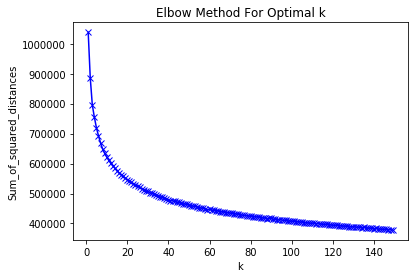

In [40]:
import matplotlib.pyplot as plt
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [23]:
np.linalg.norm(train_data[0]-train_data[8603]) - np.linalg.norm(train_data[0]-train_data[8358])

-0.14530277

In [21]:
train_knn.iloc[0:1].values

array([[ 8603,  8358, 32623, 40916, 28781, 31425, 37868, 22430, 39481,
        47625, 45776, 46167, 17986,  9326, 15726, 30514, 33685, 21588,
        30250, 45416, 43026, 27364, 26275, 40688, 10148, 21692, 21025,
        14304, 29672, 14507, 34898, 44262, 16825, 45117, 44149, 36060,
        10060, 15824,  4449, 18962,  6698, 45926, 18324, 11269, 18074,
        31238,   143, 45841, 43724,  5582, 40566, 15273, 21263,  1339,
        25019, 25367, 32308, 19892,  8061, 31728, 18221, 41264,  3581,
        28833, 15612, 35058, 44082, 34630, 31718,  2370,  8335,  3977,
         2422, 19437, 32895, 20379, 35914, 35634, 30532, 39324, 35005,
        21616, 18431, 23617, 44809, 21236,  7207,  4392, 30508, 40892,
        37822, 37301, 38648,  2892, 29135, 44529, 31498, 35895, 16152,
        24705]])